In [2]:
#import libraries
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# sns.set_theme(style="darkgrid")
# %config InlineBackend.figure_formats = ['svg']

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %config InlineBackend.figure_formats = ['svg']

In [41]:
#load the data
car_df = pd.read_csv('./data/car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [4]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
car_df.shape

(558811, 16)

In [6]:
car_df.duplicated().sum()

0

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [42]:
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


<AxesSubplot:>

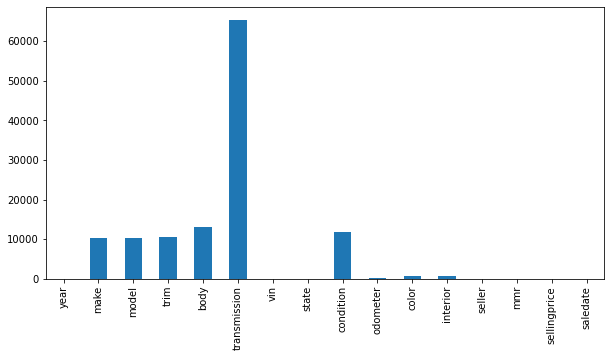

In [8]:
#show null values as grap
car_df.isnull().sum().plot(kind='bar', figsize=(10,5))

In [9]:
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


#### Basic Infomation from the data shows that: 

<ul style = "background-color: #f0f5f5; 
            border-radius: 5px; padding: 15px 30px;
            font-size: 15px; line-height: 2em">
        <li>There are 558811 data points and 16 variables</li>
           <li>Some variables contains null values. The transmission variable has the largest amount of nulls up to 11.63%</li>
       <li>Most of the variables do not have the approporiate data type assigned to them: this would be handled</li>
       <li>Dataset consists of car prices from 1982 to 2015</li>
</ul>
         
           


## Data Cleaning

<ol style = "background-color: #f0f5f5; 
            border-radius: 5px; padding: 15px 30px;
            font-size: 15px; line-height: 2em">
        <li>Handle Null values</li>
         <li>Check for duplicates</li>
        <li>Convert variables to approprite data types</li>
        <li>Drop the vin column: this column represents the car identification number, and it's not neccessary</li>
       
</ol>

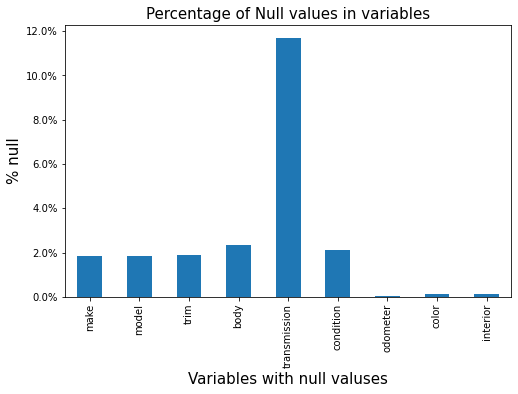

In [10]:
#show the distribution the transmission variable
nulls_df = pd.DataFrame(car_df.isnull().sum()[car_df.isnull().sum() != 0])
nulls_df['%null'] =  (nulls_df[0] / car_df.shape[0]) * 100
ax = nulls_df['%null'].plot(kind='bar', figsize=(8, 5))

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
_ = plt.title('Percentage of Null values in variables', fontsize=15)
_ = plt.xlabel('Variables with null valuses', fontsize=15)
_ = plt.ylabel('% null', fontsize=15)

#### From the above chart:

<ul style = "background-color: #f0f5f5; 
            border-radius: 5px; padding: 15px 30px;
            font-size: 15px; line-height: 2em">
        <li>Only the transmission column contains a considerable amount of null values, which is more than 10%</li>
           <li>The rest contains very little nulls. These nulls would be droppd since they are less than 2.1% and this would not bring significant change in  the analysis and model.</li>
       <li>For the transmission column, the nulls would be replaced with the mode: highest occurence</li>

</ul>
         

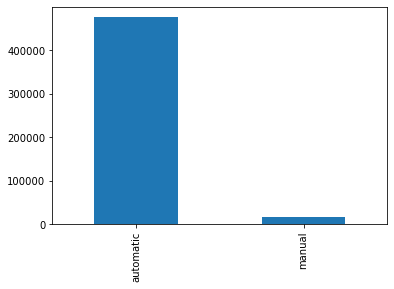

In [11]:
font_size = 15
_ = car_df.transmission.value_counts().plot(kind='bar')

In [12]:
#replace null values with the mode: highest occurence on the transmission column
car_df.transmission = car_df.transmission.fillna(car_df.transmission.mode()[0])

In [13]:
#drop null values from the remaining columns
car_df = car_df.dropna()

In [14]:
car_df.isnull().sum().sum()

0

In [15]:
#convert variable types to appropriate dtype
car_df.saledate = pd.to_datetime(car_df.saledate, utc=True)

#select only the date attribute of the date: remove the time attribute
#as this is not neccessary
# car_df.saledate = [time.date() for time in car_df.saledate]

In [16]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533660 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          533660 non-null  int64              
 1   make          533660 non-null  object             
 2   model         533660 non-null  object             
 3   trim          533660 non-null  object             
 4   body          533660 non-null  object             
 5   transmission  533660 non-null  object             
 6   vin           533660 non-null  object             
 7   state         533660 non-null  object             
 8   condition     533660 non-null  float64            
 9   odometer      533660 non-null  float64            
 10  color         533660 non-null  object             
 11  interior      533660 non-null  object             
 12  seller        533660 non-null  object             
 13  mmr           533660 non-null  int64        

In [17]:
car_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-14 20:30:00+00:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-28 20:30:00+00:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 04:30:00+00:00


In [18]:
#drop the vin column
car_df = car_df.drop(columns=['vin'])

In [19]:
car_df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'suv',
       'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

In [20]:
car_df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Buick', 'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Geo', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [21]:
car_df.color.unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

<p style = "background-color: #f0f5f5; 
            border-radius: 5px; padding: 15px 30px;
            font-size: 15px; line-height: 2em">
    From the first two arrays above, it's clear that some of the elements are identical but some are lower case, others uppercase. We'd convert all to lower case
</p>

In [22]:
car_df.dtypes

year                          int64
make                         object
model                        object
trim                         object
body                         object
transmission                 object
state                        object
condition                   float64
odometer                    float64
color                        object
interior                     object
seller                       object
mmr                           int64
sellingprice                  int64
saledate        datetime64[ns, UTC]
dtype: object

In [23]:
car_df.body = car_df.body.str.lower()
car_df.make = car_df.make.str.lower()

In [24]:
car_df.head()
car_df.shape

(533660, 15)

In [25]:
#save cleaned file to as csv
car_df.to_csv('car_df_cleaned.csv')

## Exploratory Data Analysis

In [26]:
#create new columns to represent the month car was sold, and the difference between selling price and wholesale price
car_df['month'] = car_df.saledate.dt.month
car_df['mmr_df'] = abs(car_df.mmr - car_df.sellingprice)

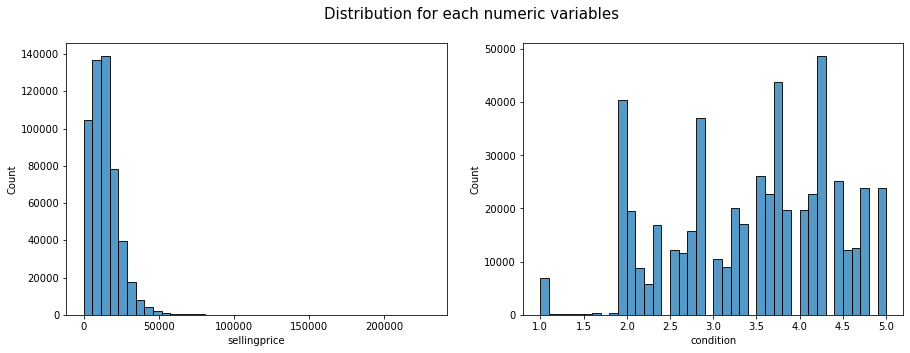

In [27]:
# _ = car_df.sellingprice.hist(bins=30, figsize=(10,5))
# plt.title('Distribution of car prices', fontsize=font_size)
# plt.xlabel('Price', fontsize=font_size)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax = ax.ravel()
for index, data in enumerate(['sellingprice', 'condition']):
    sns.histplot(data =car_df, x=data, ax=ax[index], bins=40)
    
_ = fig.suptitle('Distribution for each numeric variables', fontsize=font_size)

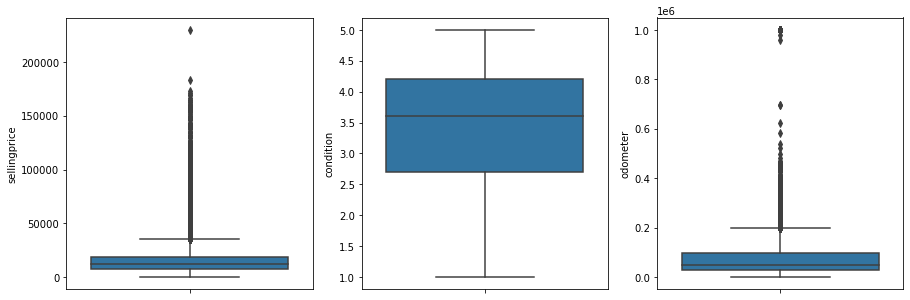

In [28]:
#check fo outliers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax = ax.ravel()
for index, data in enumerate(['sellingprice', 'condition', 'odometer']):
    sns.boxplot(data =car_df, y=data, ax=ax[index])
    
# _ = fig.suptitle('Distribution for each numeric variables', fontsize=font_size)

In [29]:
#check for unique make that makes up this outliers
outliers = car_df[car_df.sellingprice > 50000]

outliers.make.unique()

array(['bmw', 'chevrolet', 'mercedes-benz', 'lexus', 'land rover',
       'porsche', 'audi', 'ferrari', 'jaguar', 'nissan', 'bentley',
       'ford', 'rolls-royce', 'infiniti', 'maserati', 'cadillac', 'tesla',
       'toyota', 'jeep', 'gmc', 'aston martin', 'fisker', 'hyundai',
       'lamborghini', 'lincoln', 'ram', 'dodge'], dtype=object)

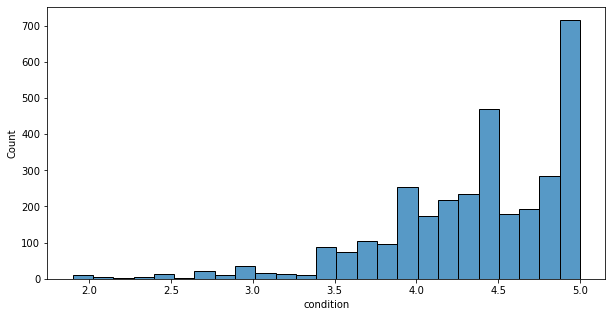

In [30]:
#what are the condition of these cars considering they're sold for so much money
plt.figure(figsize=(10, 5))
_ = sns.histplot(data=outliers, x='condition', bins=25)

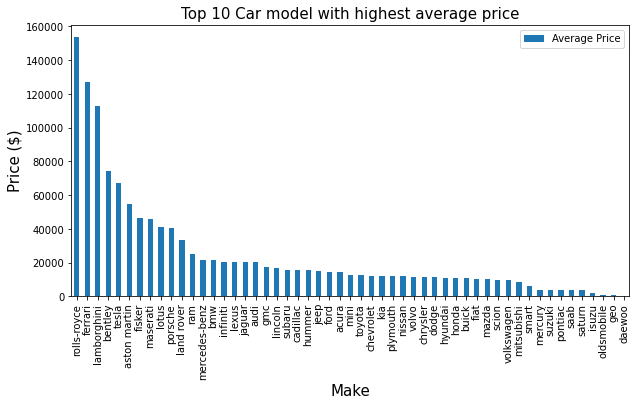

In [31]:

filterd_2 = car_df.groupby('make')['sellingprice'].agg([np.mean]). \
                     sort_values('mean', ascending=False). \
                            rename( columns = {'mean': 'Average Price'})

_ = filterd_2.iloc[:, :].plot.bar(figsize=(10, 5))
plt.title('Top 10 Car model with highest average price', fontsize=font_size)
_ = plt.xlabel('Make', fontsize=font_size)
_ = plt.ylabel('Price ($)', fontsize=font_size)

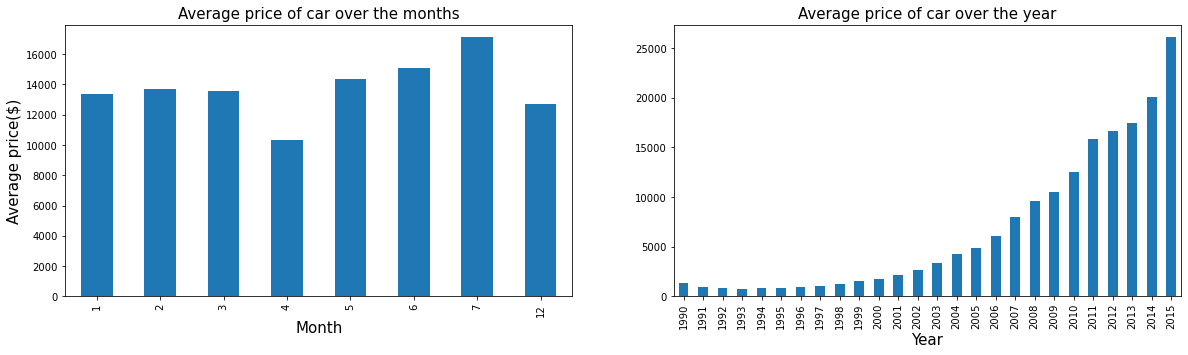

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax = ax.ravel()
car_df.groupby('month')['sellingprice'].agg(np.average).plot.bar(ax=ax[0])
car_df.groupby('year')['sellingprice'].agg(np.average).plot.bar(ax=ax[1])

_ = ax[1].set_xlabel('Year', fontsize=font_size)
_ = ax[1].set_title('Average price of car over the year', fontsize=font_size)
_ = ax[0].set_title('Average price of car over the months', fontsize=font_size)
_ = ax[0].set_ylabel('Average price($)', fontsize=font_size)
_ = ax[0].set_xlabel('Month', fontsize=font_size)

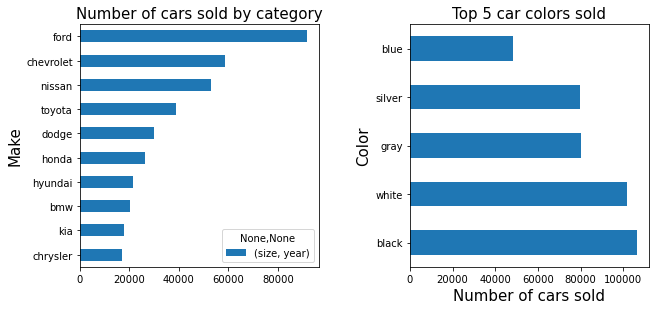

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.tight_layout(pad=6)

ax = ax.ravel()
_ = car_df.color.value_counts()[:5].plot.barh(figsize=(10, 5), ax=ax[1])
_ = ax[1].set_title('Top 5 car colors sold', fontsize=font_size)
_ = ax[1].set_xlabel('Number of cars sold', fontsize=font_size)
_ = ax[1].set_ylabel('Color', fontsize = font_size)

pivot = car_df.pivot_table(index='make', 
                           values = 'year', aggfunc=[np.size], 
                           fill_value=0, margins=True).sort_values(
                                    by=[('size', 'year')])


_ = pivot.iloc[-11:-1, :].plot.barh(figsize=(10, 5), ax=ax[0])
_ = ax[0].set_title('Number of cars sold by category', fontsize=font_size)
_ = ax[0].set_ylabel('Make', fontsize = font_size)


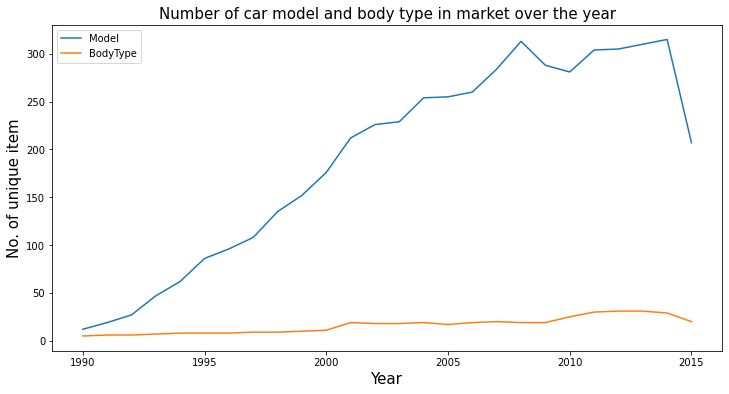

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

unique_model_per_year = car_df.groupby('year')['model', 'body'].agg([np.unique])
unique_model_per_year['Distinct Model'] = unique_model_per_year[('model', 'unique')].apply(lambda x: len(x))
unique_model_per_year['Distinct BodyType'] = unique_model_per_year[('body', 'unique')].apply(lambda x: len(x))

_ = unique_model_per_year[['Distinct Model', 'Distinct BodyType']].plot(figsize=(12, 6), ax=ax)
_ = ax.set_title('Number of car model and body type in market over the year', fontsize=font_size)
_ = ax.set_xlabel('Year', fontsize=font_size)
_ = ax.set_ylabel('No. of unique item', fontsize = font_size)
_ = ax.legend(['Model', 'BodyType'])

Text(0, 0.5, 'Seller')

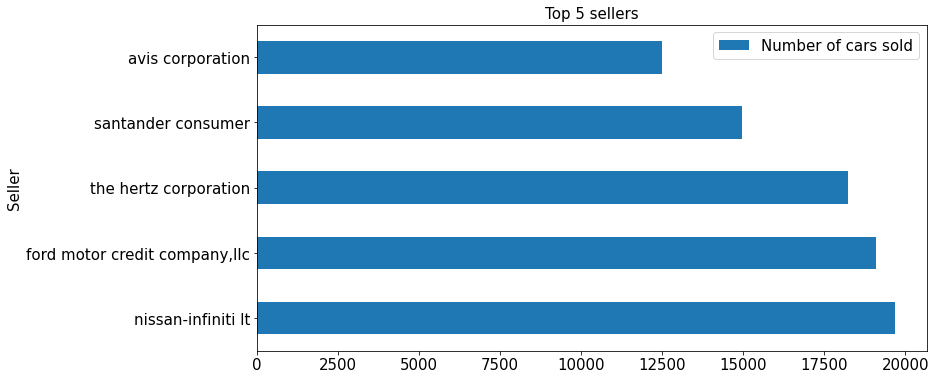

In [35]:
pivot_2 = car_df.pivot_table(index='seller', 
                           values = 'sellingprice', aggfunc=[np.size])

ax = pivot_2.sort_values(by=('size', 'sellingprice'), ascending=False).iloc[:5, :].plot.barh(figsize=(12, 6), fontsize=15)

ax.legend(['Number of cars sold'], fontsize = 15)
plt.title('Top 5 sellers', fontsize=15)
plt.ylabel('Seller', fontsize=15)

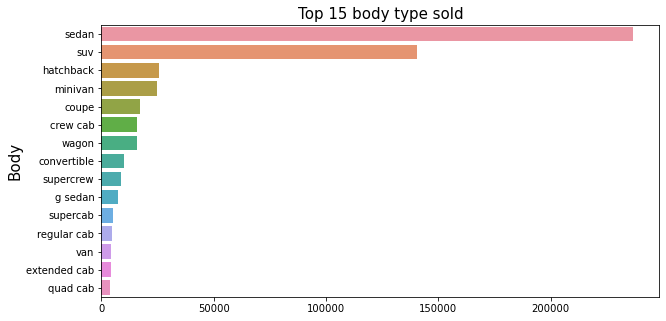

In [36]:
data = car_df.body.value_counts()[:15]
x = data.index
y = data.values

plt.figure(figsize=(10, 5))
sns.barplot(y=x, x=y)
_ = plt.title('Top 15 body type sold', fontsize=font_size)
_ = plt.ylabel('Body', fontsize=font_size)

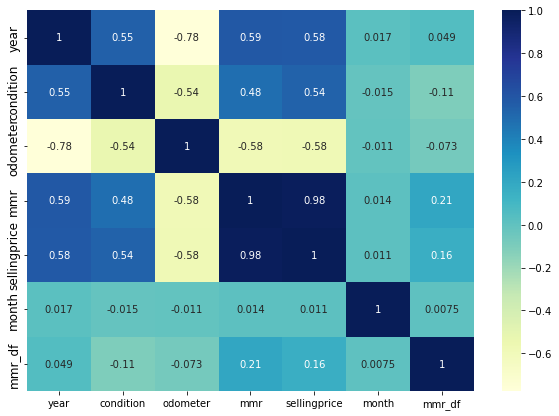

In [37]:
font_size = 15
plt.figure(figsize=(10, 7))
res = sns.heatmap(car_df.corr(), cmap='YlGnBu', annot=True)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)

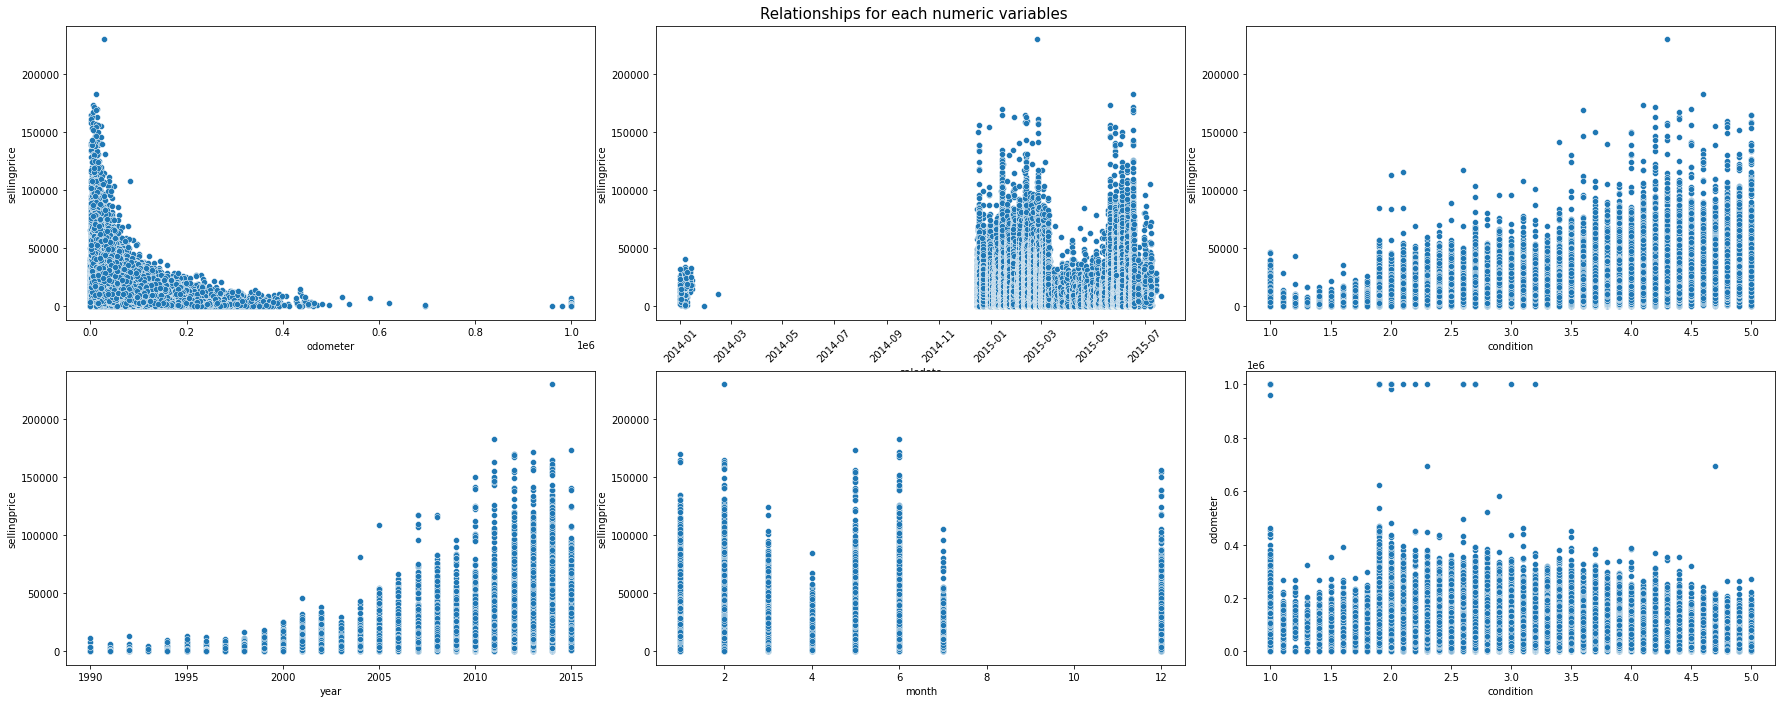

In [38]:
fig, ax = plt.subplots(2, 3, figsize=(25, 10))
plt.tight_layout(pad=3)

ax = ax.ravel()
for index, data in enumerate([car_df.odometer, car_df.saledate, car_df.condition, car_df.year, car_df['month']]):
    sns.scatterplot(x=data, y = car_df.sellingprice, ax=ax[index])
    
_ = fig.suptitle('Relationships for each numeric variables', fontsize=font_size)
_ = sns.scatterplot(x=car_df.condition, y = car_df.odometer, ax = ax[5])
_ = ax[1].tick_params(axis='x',rotation=45)

## Summary

<ul style = "background-color: #f0f5f5; 
            border-radius: 5px; padding: 15px 30px;
            font-size: 15px; line-height: 2em">
        <li>the distribution of the car prices are right skewed with most cars sold between <code>1k</code> to <code>27.7k</code> but with very few cars cars that are sold much more</li>
        <li>The car conditions doesn't show any clear distribution, but majority of the cars have conditions >=  <code>2.0. with few car havaing conditions less than  <code>2.0, Precisely, 50% of the cars have conditons </code> 3.6 </code> with 25% less than 3.6 and 95$  less than  <code> 4.8</code> </li>
        <li>Initially there seem to be outliers in the car prices. but a deeper look into the datasets reveals that these high-priced cars a perculiar to specific cars models which  includes  <code>
        bmw', 'chevrolet', 'mercedes-benz', 'lexus', 'land rover',
       'porsche', 'audi', 'ferrari', 'jaguar', 'nissan', 'bentley',
       'ford', 'rolls-royce', 'infiniti', 'maserati', 'cadillac', 'tesla',
       'toyota', 'jeep', 'gmc', 'aston martin', 'fisker', 'hyundai',
       'lamborghini', 'lincoln', 'ram', 'dodge'</code>
    <br>Also checking the conditions of these high-priced cars shows left-skewed distribution with most of the cars having conditions ranging from 3.5 - 5.0</li>

   <li> <code>'rolls-royce', 'ferrari', 'lamborghini', 'bentley', 'tesla',
 'aston martin', 'fisker', 'maserati', 'lotus', 'porsche', 'land rover','ram'</code> made it to the top 10 cars with highest averaged price: which means that these cars a priced higher than than thier peers </li>
 or cars which havn't been driven for a longer period of time</li>
 <li>Does car prices change over time ? Yes. The <code>year-sellingprice</code> scatter plot reveals that cars worth 50k where sold starting from the year 2005, and much more cars of higher prices have emerged up till 2015. This may result due to the fact that new brands and models are being introduced into the market as time goes on. The unique model chart shows very little number of car models from 1990 and a drastic rise up to 2014 where it reached its peak, and reduced in the subsequent year</li>
 <li>What factors are affects the price of a car ? From the scatter plots show car <code>odometer</code>(which signifies total distance travelled by a car) and <code>condition</code> are related with the car price, and car odometer having a non-linear relationship with selling-price; meaning the car prices tends to rise more faster 
 <li>On monthly basis car prices doesn't show an appreciable relationship with the selling price; but a deeper look shows a drop in price between the third, fourth and seventh month of the year 2015</li>
 <li>As one would expect, the better the condition of a car, the higher the price may be. This also holds in this dataset, where a linear relationship exist between the car selling prices and conditions</li>
</ul>
         